# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server. 

### Import Statements

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [3]:
df_data = pd.read_csv('nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration. 
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [4]:
df_data.shape

(962, 16)

In [5]:
df_data.dtypes

year                      int64
category                 object
prize                    object
motivation               object
prize_share              object
laureate_type            object
full_name                object
birth_date               object
birth_city               object
birth_country            object
birth_country_current    object
sex                      object
organization_name        object
organization_city        object
organization_country     object
ISO                      object
dtype: object

**Challange**: 
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values?  

### Check for Duplicates

In [6]:
df_data.duplicated().sum()

0

### Check for NaN Values

In [7]:
df_data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

In [8]:
df_data[df_data.motivation.isna()].head(2)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE


In [9]:
df_data[df_data.birth_date.isna()].head(2)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
24,1904,Peace,The Nobel Peace Prize 1904,NaN,1/1,Organization,Institut de droit international (Institute of ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,1910,Peace,The Nobel Peace Prize 1910,NaN,1/1,Organization,Bureau international permanent de la Paix (Per...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_data[df_data.ISO.isna()].head(2)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
24,1904,Peace,The Nobel Peace Prize 1904,NaN,1/1,Organization,Institut de droit international (Institute of ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,1910,Peace,The Nobel Peace Prize 1910,NaN,1/1,Organization,Bureau international permanent de la Paix (Per...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Type Conversions

**Challenge**: 
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [11]:
df_data.birth_date = pd.to_datetime(df_data.birth_date)

#### Add a Column with the Prize Share as a Percentage

In [12]:
# convert prize share column to float by performing conversions and string operations 
separated = df_data.prize_share.astype(str).str.split('/', expand=True)
numerator = pd.to_numeric(separated[0])
denominator = pd.to_numeric(separated[1])

df_data['share_pct'] = numerator / denominator

In [13]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [14]:
# graph donut chart showing percentage of male vs female laureates
biology = df_data.sex.value_counts()

biology_fig = px.pie(
    biology,
    names=biology.index,
    labels=biology.index,
    values=biology.values,
    title='Percentage of Male vs. Female Laureates', 
    hole=0.4
)

biology_fig.show()

# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**: 
* What are the names of the first 3 female Nobel laureates? 
* What did they win the prize for? 
* What do you see in their `birth_country`? Were they part of an organisation?

In [15]:
# find female laureates
female_laureates = df_data[df_data.sex == 'Female']

female_laureates.sort_values(by='year').head(3)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.25
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,1.00
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,1.00


# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they? 

In [16]:
# find people who won more than once

for person in df_data[df_data.full_name.duplicated()].full_name:
    print(f'{person}: {df_data[df_data.full_name == person].prize.count()}')

Marie Curie, née Sklodowska: 2
Comité international de la Croix Rouge (International Committee of the Red Cross): 3
Linus Carl Pauling: 2
Comité international de la Croix Rouge (International Committee of the Red Cross): 3
John Bardeen: 2
Frederick Sanger: 2
Office of the United Nations High Commissioner for Refugees (UNHCR): 2


# Number of Prizes per Category

**Challenge**: 
* In how many categories are prizes awarded? 
* Create a plotly bar chart with the number of prizes awarded by category. 
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded? 

In [17]:
# find the number of categories
df_data.category.nunique()

6

In [18]:
# construct chart for prize distribution by category
prizes_per_category = df_data.category.value_counts()

prz_per_cat_fig = px.bar(
    prizes_per_category, 
    x=prizes_per_category.index,
    y=prizes_per_category.values,
    title='Percentage of Prizes awarded in Categories',
    color=prizes_per_category.values,
    color_continuous_scale=px.colors.sequential.Aggrnyl
    )

prz_per_cat_fig.update_layout(
    xaxis_title='Nobel Prize Category', 
    coloraxis_showscale=False,
    yaxis_title='Number of Prizes'
)

prz_per_cat_fig.show()

**Challenge**: 
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [19]:
# find the first ever nobel prize winner in the economic field
economic_laureates = df_data[df_data.category == 'Economics']

economic_laureates.head(1)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD,0.50


# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category. 
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

In [20]:
biology_by_category = df_data.groupby(['category', 'sex'], as_index=False).agg({'prize': pd.Series.count})

# reviewer Louise here, this was the problem I spent most time in because I wanted to solve it
# without looking at Angela's solution code, and hence, study with my own learned capabilities.

# The problem was I can't figure out how I could group the data with respect to category, while
# also splitting the prize count with respect to gender. The problem revolved around how I could
# get 3 columns; namely category, sex, and count, with the category column having two sub-categories
# between male and female, and their respective prize counts.

# I forgot that the groupby function also takes in a LIST of columns, in which I could have saved
# myself some time figuring out how I could count the prize. The reason I was having trouble with
# it was because I was focused on the category and sex columns, figuring out how I could make the
# sex column show even while using the value_counts function on it.

# with the code above, what it does is group the data according to the string arguments of the
# columns, and then apply more methods to the data it groups. Which then results to the following
# dataframe...

biology_by_category

,category,sex,prize
0,Chemistry,Female,7
1,Chemistry,Male,179
2,Economics,Female,2
3,Economics,Male,84
4,Literature,Female,16
5,Literature,Male,101
6,Medicine,Female,12
7,Medicine,Male,210
8,Peace,Female,17
9,Peace,Male,90


In [21]:
biology_by_category.sort_values(by='prize', ascending=False, inplace=True)

bio_by_cat_fig = px.bar(
    biology_by_category,
    x=biology_by_category.category,
    y=biology_by_category.prize,
    color=biology_by_category.sex,
)

bio_by_cat_fig.update_layout(
    xaxis_title='Nobel Prize Category', 
    coloraxis_showscale=False,
    yaxis_title='Number of Prize per Gender',
    title='Number of Prizes Awarded per Category split by Men and Women'
)

bio_by_cat_fig.show()

# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually. 
* Count the number of prizes awarded every year. 
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy). 

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dodgerblue` while the rolling average is coloured in `crimson`. 

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out? 
* What could be the reason for the trend in the chart?


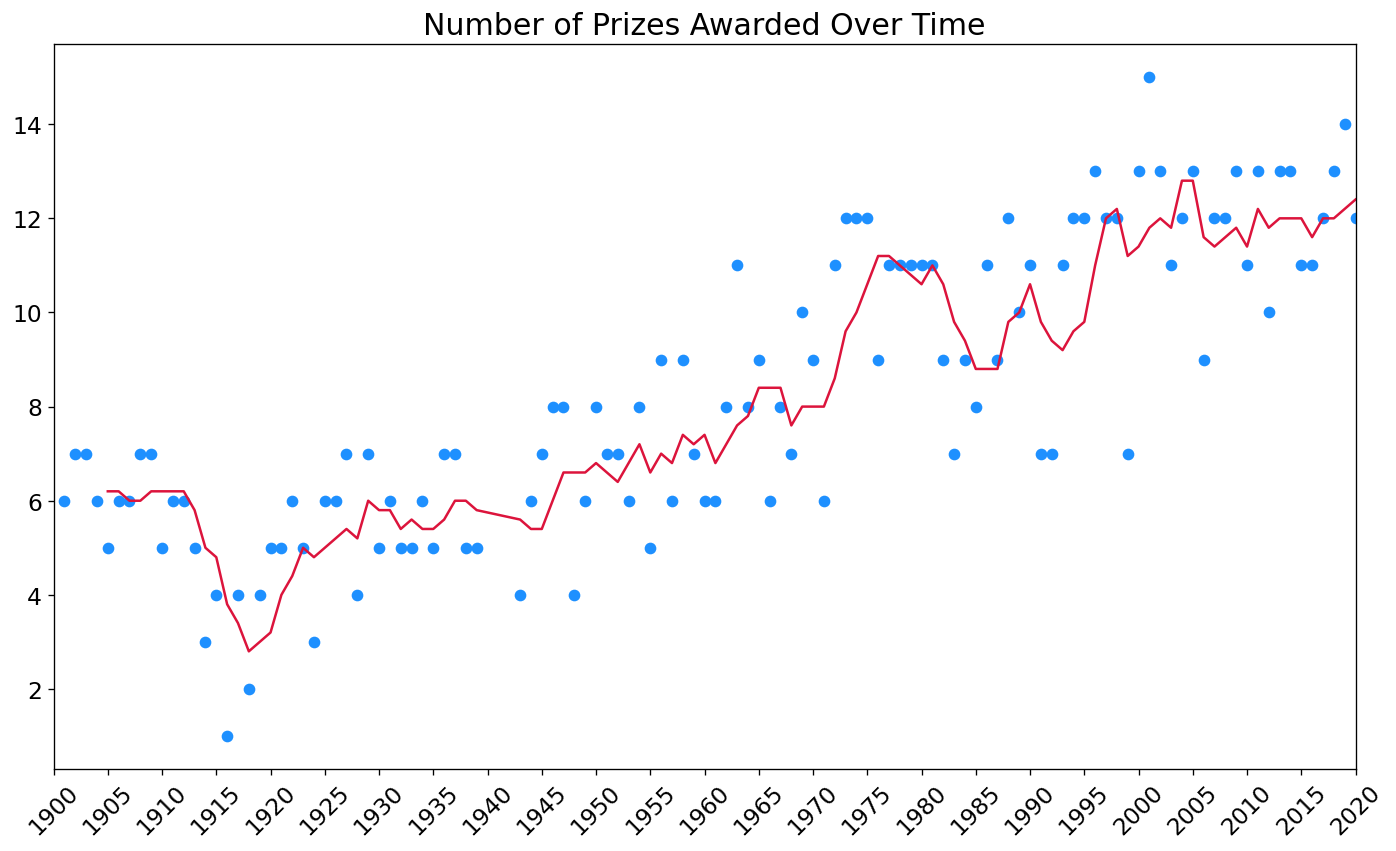

In [22]:
prizes_per_year = df_data.groupby('year').agg({'prize': pd.Series.count})

# figure config
plt.figure(figsize=(14,8), dpi=120)
plt.xticks(
    ticks=np.arange(1900, prizes_per_year.index.max() + 1, step=5),
    fontsize=14, 
    rotation=45)
plt.yticks(fontsize=14)
plt.title('Number of Prizes Awarded Over Time', fontsize=18)
plt.xlim(1900, prizes_per_year.index.max())

# make rolling mean for easy data viewing
roll_df = prizes_per_year.rolling(window=5).mean()

# plot
plt.scatter(
    x=prizes_per_year.index,
    y=prizes_per_year.prize,
    c='dodgerblue'
)

plt.plot(
    roll_df.prize,
    'crimson'
)

plt.show()


# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before. 

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart. 
* See if you can invert the secondary y-axis to make the relationship even more clear. 

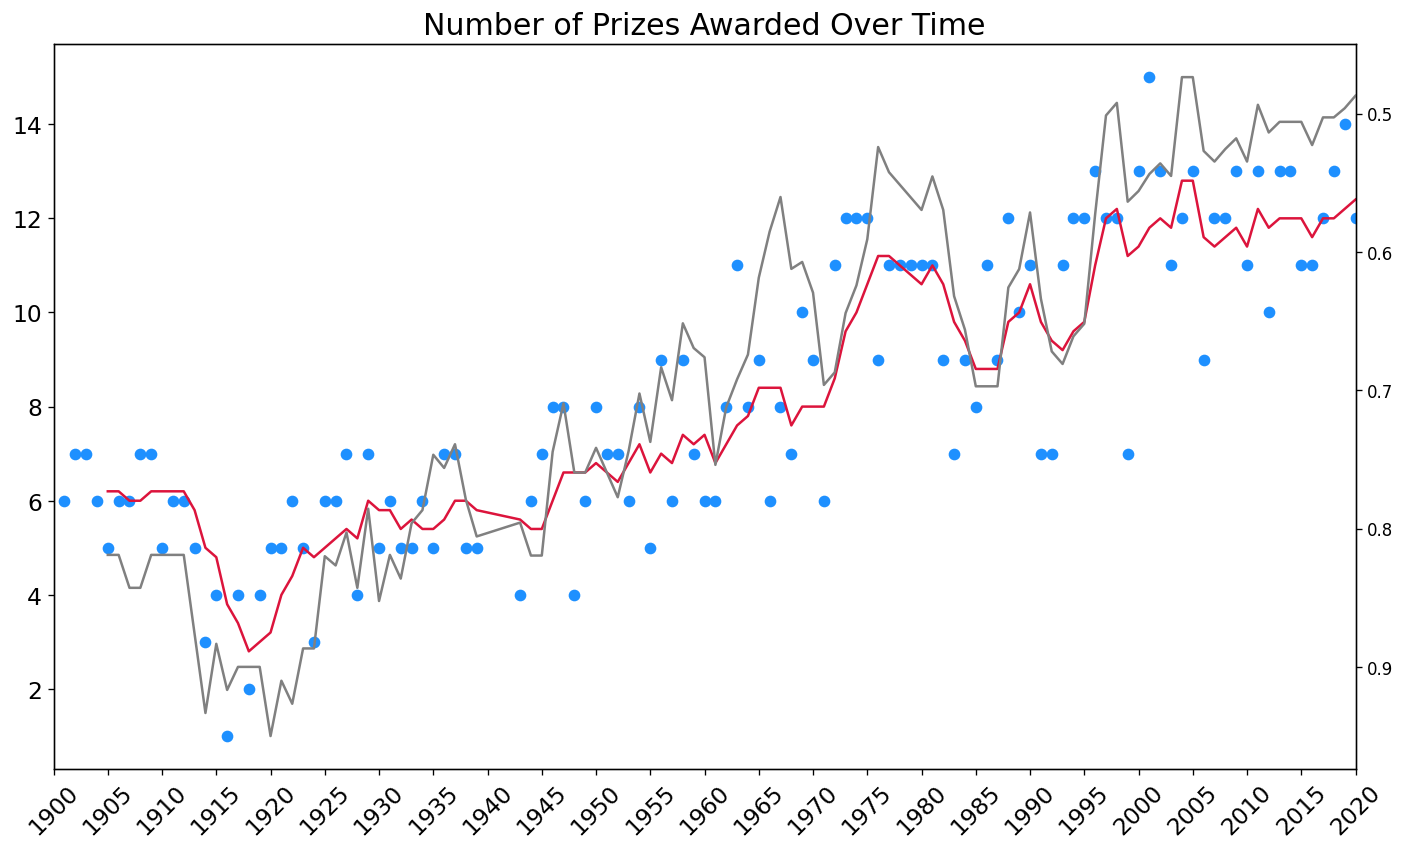

In [23]:
share_by_year = df_data.groupby('year').agg({'share_pct': pd.Series.mean})

# figure config
plt.figure(figsize=(14,8), dpi=120)
plt.xticks(
    ticks=np.arange(1900, prizes_per_year.index.max() + 1, step=5),
    fontsize=14, 
    rotation=45)
plt.yticks(fontsize=14)
plt.title('Number of Prizes Awarded Over Time', fontsize=18)
plt.xlim(1900, prizes_per_year.index.max())

# make rolling mean for easy data viewing
roll_prize = prizes_per_year.rolling(window=5).mean()
roll_share = share_by_year.rolling(window=5).mean()

# make two y-coordinates
ax1 = plt.gca()
ax2 = ax1.twinx()

# the Axes class has an invert axis function that is quite handy
ax2.invert_yaxis()

# plot
ax1.scatter(
    x=prizes_per_year.index,
    y=prizes_per_year.prize,
    c='dodgerblue'
)

ax1.plot(
    roll_prize.prize,
    'crimson'
)

ax2.plot(
    roll_share.share_pct,
    'gray'
)

# The Countries with the Most Nobel Prizes

**Challenge**: 
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won. 

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`? 
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic? 
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [24]:
top_countries = pd.DataFrame(df_data.groupby('birth_country_current', as_index=False).agg({'prize': pd.Series.count}))
top_countries.sort_values(by='prize', inplace=True)
top_countries = top_countries[-20:]

In [25]:
h_top_c_bar = px.bar(
    data_frame=top_countries,
    x='prize',
    y='birth_country_current',
    orientation='h',
    color='prize',
    title='Top 20 Countries by Number of Prizes'
)

h_top_c_bar.update_layout(
    xaxis_title='Number of Prizes',
    yaxis_title='Country',
    showlegend=False
)

h_top_c_bar.show()

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 

Hint: You'll need to use a 3 letter country code for each country. 


In [26]:
codes = []
for country in top_countries.birth_country_current:
    codes.append(df_data[df_data['birth_country_current'] == country]['ISO'].values[0])

top_countries['ISO'] = codes

In [27]:
top_countries.head()

,birth_country_current,prize,ISO
7,Belgium,9,BEL
31,Hungary,9,HUN
33,India,9,IND
2,Australia,10,AUS
20,Denmark,12,DNK


In [28]:
top_c_choro = px.choropleth(
    data_frame=top_countries,
    locations='ISO',
    color='prize',
    locationmode='ISO-3',
    color_continuous_scale=px.colors.sequential.matter
)

top_c_choro.show()

# In Which Categories are the Different Countries Winning Prizes? 

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart! 


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


In [29]:
# group the data according to country and category, and then get prize count
top_countries_by_cat = pd.DataFrame(df_data.groupby(by=['birth_country_current', 'category'], as_index=False).agg({'prize': pd.Series.count}))

# group the data again by country, and accumulate prizes
total_prize = top_countries_by_cat.groupby('birth_country_current', as_index=False).agg({'prize': pd.Series.sum})

# sort the values before commencing merge
total_prize.sort_values(by='prize', ascending=False, inplace=True)

# merge. the merge function RETURNS a dataframe, not does inplace.
# by applying merge with limited amount of data in the birth_country_current column in the total_prize dataframe,
# the method only returns the data that have been merged successfully, not minding NaN values, which
# is a result of no corresponding data on the other dataframe.
top_countries_by_cat = top_countries_by_cat.merge(
    right=total_prize[:20], 
    on='birth_country_current'
)

In [30]:
# rename the prizes, and remember the INPLACE FKDJNGBA
top_countries_by_cat.rename(columns={'prize_x': 'cat_prize', 'prize_y': 'total_prize'}, inplace=True)

# and then sort the values
top_countries_by_cat.sort_values(by='total_prize', inplace=True)

In [31]:
# finally commence the graph
h_country_c_bar = px.bar(
    data_frame=top_countries_by_cat,
    x='total_prize',
    y='birth_country_current',
    orientation='h',
    color='category'
)

h_country_c_bar.update_layout(
    xaxis_title='Number of Prizes',
    yaxis_title='Country',
    title='Number of Prizes per Country by Category'
)

h_country_c_bar.show()

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won? 
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this. 
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line. 

In [32]:
# group according to year and country, and then count the prizes per year
countries_overtime = df_data.groupby(by=['year', 'birth_country_current'], as_index=False).agg({'prize': pd.Series.count})

# The reason I did this merge was for me to only filter out the top 20 countries I've
# already recorded before.
countries_overtime = countries_overtime.merge(right=top_countries, on='birth_country_current')

# but because of the recent merge I did, I had to drop the prize column from the previous
# top_countries dataframe since it was not data collected each year
countries_overtime.drop(['prize_y', 'ISO'], axis=1, inplace=True)

# and then polish some columns
countries_overtime.rename(columns={'prize_x': 'prize'}, inplace=True)

countries_overtime['cum_sum'] = countries_overtime.groupby(['birth_country_current'])['prize'].cumsum()

countries_overtime.sort_values(by='year', inplace=True)

countries_overtime

,year,birth_country_current,prize,cum_sum
0,1901,France,2,2
145,1901,Switzerland,1,1
120,1901,Poland,1,1
104,1901,Netherlands,1,1
41,1901,Germany,1,1
...,...,...,...,...
102,2019,Germany,1,83
103,2020,Germany,1,84
406,2020,United States of America,7,281
40,2020,France,1,57


In [33]:
# # My 1st solution with matplotlib
# plt.figure(figsize=(14,8), dpi=120)

# for country in countries_overtime.birth_country_current.unique():
#     country_to_plot = countries_overtime[countries_overtime.birth_country_current == country]

#     plt.plot(
#         country_to_plot.year,
#         country_to_plot.prize.cumsum(),
#         linewidth=3,
#         label=country
#     )

# plt.legend(fontsize=12)

# My 2nd solution with plotly
countries_ovtime_fig = px.line(
    countries_overtime,
    x='year',
    y='cum_sum',
    color='birth_country_current'
)

countries_ovtime_fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Prize Overtime',
    title='Prizes of Countries Per Year'
)

countries_ovtime_fig.show()


# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [34]:
# group data by organization and aggregate by prize count
top_organizations = df_data.groupby('organization_name', as_index=False).agg({'prize': pd.Series.count})
# alternatively you can do this...
# top_organizations = df_data.organization_name.value_counts()[:20]

# sort values 
top_organizations.sort_values(by='prize', inplace=True)

# get only the top 20
top_organizations = top_organizations[-20:]

In [35]:
# graph top organizations data
h_top_org_bar = px.bar(
    top_organizations,
    x='prize',
    y='organization_name',
    title='Top 20 Research Institutions by Number of Prizes',
    color='prize',
    orientation='h'
)

h_top_org_bar.update_layout(
    xaxis_title='Number of Prizes',
    yaxis_title='Institution',
    font_size=11    # the labels don't show everything, so adjust the size
)

h_top_org_bar.show()

# Which Cities Make the Most Discoveries? 

Where do major discoveries take place?  

**Challenge**: 
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate. 
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [36]:
# group by city and then count prizes by city
top_cities = df_data.groupby('organization_city', as_index=False).agg({'prize': pd.Series.count})

# sort values
top_cities.sort_values(by='prize', inplace=True)

# get only the top 20
top_cities = top_cities[-20:]

In [37]:
h_top_cts_bar = px.bar(
    top_cities,
    x='prize',
    y='organization_city',
    orientation='h',
    color='prize',
    title='Top 20 Cities by Number of Prizes'
)

h_top_cts_bar.update_layout(
    xaxis_title='Prize',
    yaxis_title='City',
    font_size=11
)

h_top_cts_bar.show()

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities 

**Challenge**: 
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates. 
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York? 
* How many Nobel laureates were born in London, Paris and Vienna? 
* Out of the top 5 cities, how many are in the United States?


In [38]:
# repeat same processes above for getting data by something
top_birthcities = df_data.groupby('birth_city', as_index=False).agg({'prize': pd.Series.count})

top_birthcities.sort_values(by='prize', inplace=True)

top_birthcities = top_birthcities[-20:]

In [39]:
# get all cities from the United States
cities_in_US = df_data[df_data.birth_country_current == 'United States of America']

# group by city and then
cities_in_US = cities_in_US.groupby('birth_city', as_index=False).agg({'prize': pd.Series.count})

# get percentage of New York laureates out of all United States cities
(cities_in_US[cities_in_US.birth_city == 'New York, NY'].prize / cities_in_US.prize.sum()) * 100

88   18.86
Name: prize, dtype: float64

In [40]:
# graph top cities
h_top_bcity_bar = px.bar(
    top_birthcities,
    x='prize',
    y='birth_city',
    orientation='h',
    color='prize',
    color_continuous_scale='Plasma',
    title='Top 20 Birth Cities by the Number of Prizes'
)

h_top_bcity_bar.update_layout(
    xaxis_title='Prize',
    yaxis_title='Birth City',
    font_size=11
)

h_top_bcity_bar.show()

# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**: 

* Create a DataFrame that groups the number of prizes by organisation. 
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France? 


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



In [41]:
# The graph has a parent of COUNTRY,
# followed by the CITY, of which I assume is the org city...
# and then the organization...
top_orgs_cities = df_data.groupby(
    ['birth_country_current', 'organization_city', 'organization_name'], 
    as_index=False
    ).agg({'prize': pd.Series.count})

top_orgs_cities.sort_values(by='prize', inplace=True)

In [42]:
orgs_sb = px.sunburst(
    top_orgs_cities,
    # this next line of code works by hierarchy in the sunburst chart
    path=['birth_country_current', 'organization_city', 'organization_name'],
    values='prize',
    title='Where do Discoveries Take Place?'
)

orgs_sb.update_layout(
    xaxis_title='Number of Prizes',
    yaxis_title='City'
)

orgs_sb.show()

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you. 



In [43]:
# subtract birth year of birth_date column from the year the prize was awarded
df_data['winning_age'] = df_data.year.subtract(df_data.birth_date.dt.year)

### Who were the oldest and youngest winners?

**Challenge**: 
* What are the names of the youngest and oldest Nobel laureate? 
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [56]:
df_data[df_data.winning_age == df_data.winning_age.max()]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
937,2019,Chemistry,The Nobel Prize in Chemistry 2019,“for the development of lithium-ion batteries”,1/3,Individual,John Goodenough,1922-07-25,Jena,Germany,Germany,Male,University of Texas,Austin TX,United States of America,DEU,0.33,97.00


In [57]:
df_data[df_data.winning_age == df_data.winning_age.min()]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Pakistan,Female,NaN,NaN,NaN,PAK,0.50,17.00


In [53]:
df_data.winning_age.describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_age, dtype: float64

### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award. 
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

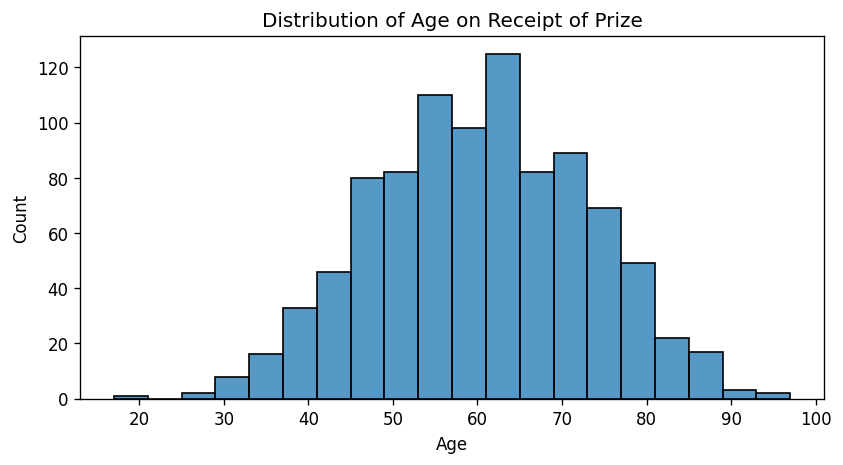

In [70]:
# turns out seaborn also runs with matplotlib's config functions, since they return Axes?
plt.figure(figsize=(8,4), dpi=120)

# the graph. I didn't really understand the question much so I had to look at what the graph
# had to look like. You see, I didn't understand statistics very well back then.
sns.histplot(
    df_data,
    x='winning_age',
    bins=20
)

# plt config
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show()

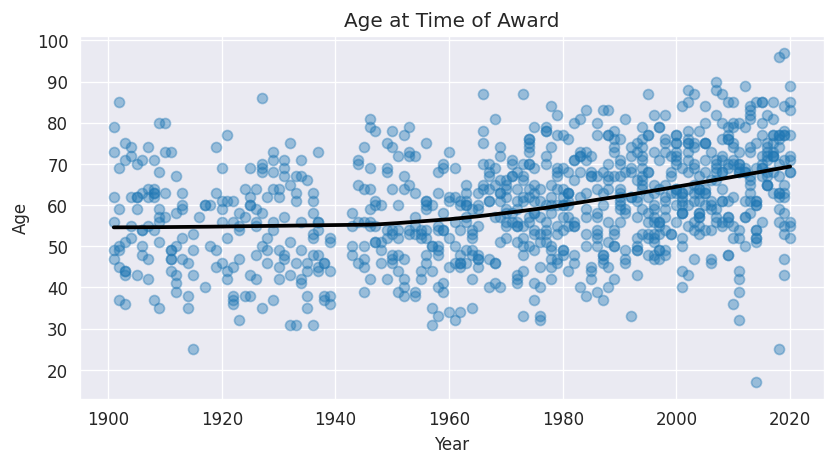

In [74]:
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(8,4), dpi=120)

    ax = sns.regplot(
        data=df_data,
        x='year',
        y='winning_age',
        lowess=True,
        scatter_kws={'alpha': 0.4},
        line_kws={'color': 'black'}
    )

    ax.set(
        xlabel='Year',
        ylabel='Age',
        title='Age at Time of Award'
    )

plt.show()

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category? 

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"? 
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

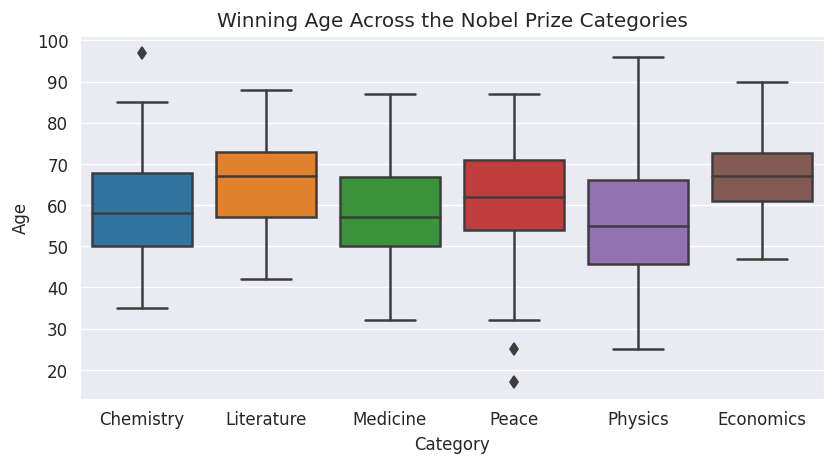

In [88]:
# apparently, using boxplot with seaborn doesn't require our data to be
# grouped. huh. strange. this is too easy...

with sns.axes_style('darkgrid'):
    plt.figure(figsize=(8,4), dpi=120)

    ax = sns.boxplot(
        data=df_data,
        x='category',
        y='winning_age'
    )

    ax.set(
        xlabel='Category',
        ylabel='Age',
        title='Winning Age Across the Nobel Prize Categories'
    )

plt.show()

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category? 
* Which category has the age trending up and which category has the age trending down? 
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter. 


<Figure size 960x480 with 0 Axes>

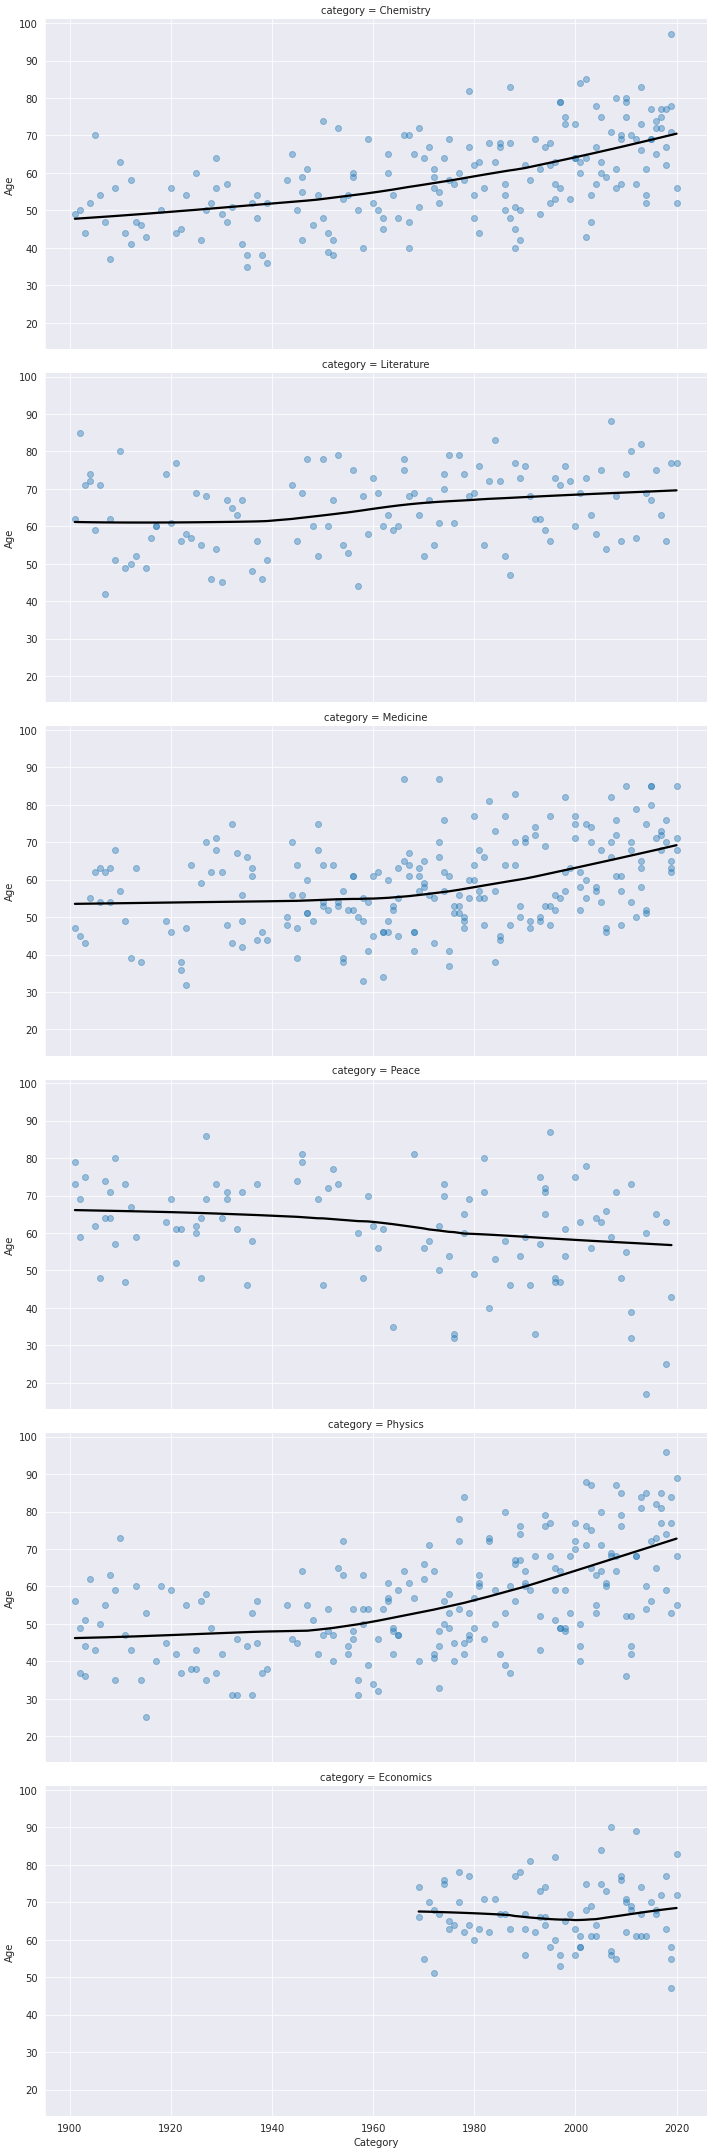

In [99]:
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(8,4), dpi=120)

    ax = sns.lmplot(
        data=df_data,
        x='year',
        y='winning_age',
        lowess=True,

        # the next line of code determines if the graph will be drawn on different charts,
        # hue would set different colors for each category, row and column would draw on
        # different charts.
        row='category',
        scatter_kws={'alpha': 0.4},
        line_kws={'color': 'black'},
        aspect=2
    )

    ax.set(
        xlabel='Category',
        ylabel='Age'
    )

plt.show()

<Figure size 960x480 with 0 Axes>

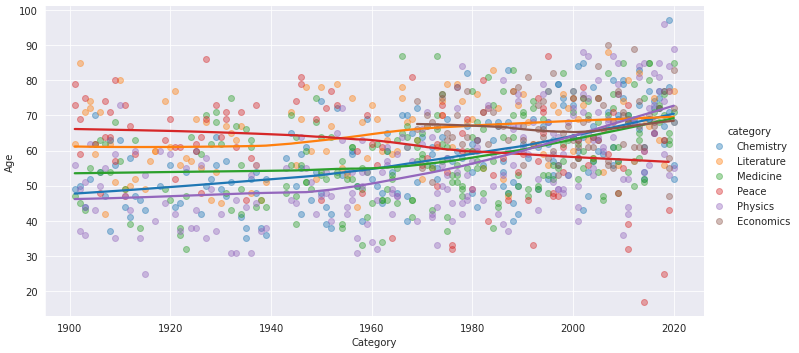

In [100]:
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(8,4), dpi=120)

    ax = sns.lmplot(
        data=df_data,
        x='year',
        y='winning_age',
        lowess=True,
        hue='category',
        aspect=2,
        scatter_kws={'alpha': 0.4}
    )

    ax.set(
        xlabel='Category',
        ylabel='Age'
    )

plt.show()